<a href="https://colab.research.google.com/github/ispineda/Bedu-Santander/blob/main/Python-Analytics/F3_S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sesion 3: Exploración de Variables Categóricas y Análisis Multivariable

### Ejemplo 1: Anotando gráficas

1. Objetivos:
    - Aprender a añadir títulos, anotaciones y leyendas a nuestras gráficas
    - Aprender a cambiar los tamaños de nuestras gráficas y modificar la dirección de nuestros tics
 
---
    
2. Desarrollo:

Vamos a aprender a añadir anotaciones a nuestras gráficas para que sean mucho más comprensibles.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


Añadir títulos y nombres para nuestros ejes es tan fácil como llamar el método `set`. Anteriormente habíamos estado llamando nuestros métodos de Seaborn sin asignar los resultados a ninguna variable. Si asignamos nuestro resultado a la variable `ax`, podemos ahora llamar el método `set` de esa variable para anotar nuestra gráfica:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


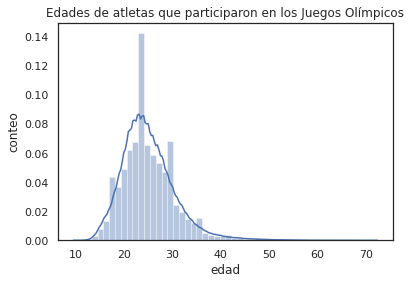

In [ ]:
ax = sns.distplot(df['age'], kde=True, norm_hist=False)
ax.set(title='Edades de atletas que participaron en los Juegos Olímpicos', xlabel='edad', ylabel='conteo');

Observa que he colocado un punto y coma al final de la última línea. Esto se hace para que Jupyter Notebooks no me muestre el output de la última línea, ya que esto ensuciaría un poco mi visualización.

En el caso de que tengamos dos o más gráficas (o categorías) al mismo tiempo, podemos añadir una leyenda a nuestra gráfica para poder diferenciar nuestros datos:

In [ ]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()

merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


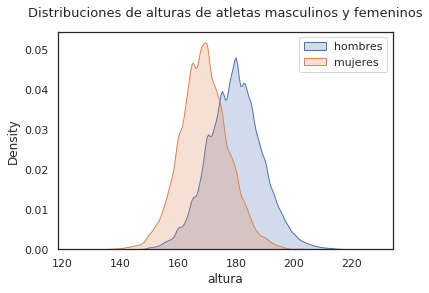

In [ ]:
ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);
ax.set(xlabel='altura');
ax.legend(loc='upper right');

En la gráfica anterior usamos el método `set_title` en vez del genérico `set` para poder agregar el tamaño de la letra (`fontsize`) y el tamaño de la separación entre el título y la gráfica (`pad`).

---

También podemos cambiar el tamaño de nuestras gráficas. Para eso tendremos que echar mano de la librería sobre la cual está construida `seaborn`: `matplotlib`. `matplotlib` es la librería de visualizaciones en Python más conocida y utilizada. Algunas de las nuevas librerías que son muy famosas, como `seaborn` están construidas sobre `matplotlib`. Esto quiere decir que para poder acceder a todo el poder de las visualizaciones en Python es importante saber cómo funcionan ambas.

Por ahora sólo vamos a ver lo siguiente:

Cada vez que creas una nueva gráfica con `seaborn`, esta gráfica está contenida dentro de algo que llamamos `figures` en `matplotlib`. Una `figure` puede contener múltiples gráficas. Cada que generas una gráfica con `seaborn`, una nueva `figure` se genera automáticamente. Podemos generar manualmente la `figure` para después utilizarla para personalizar nuestra gráfica. Para determinar el tamaño de nuestra gráfica podemos hacer lo siguiente:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


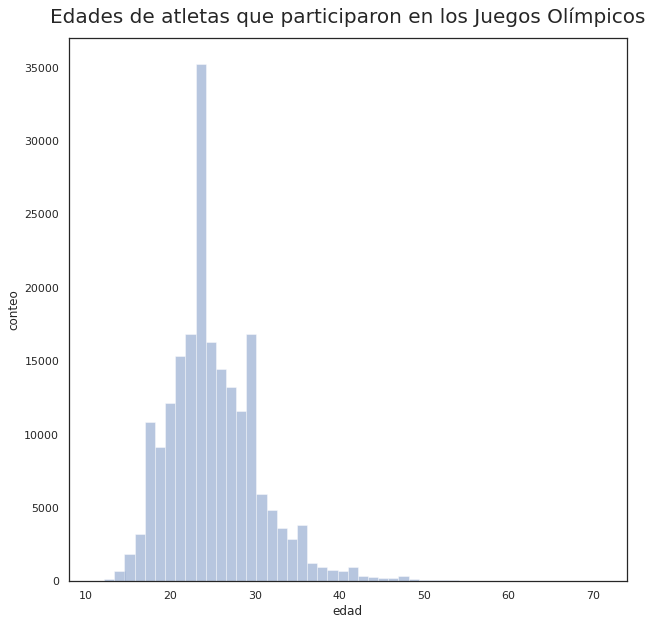

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');

A través de todo el módulo, iremos poco a poco viendo cómo modificar nuestras gráficas para que se vean bien y sean más comprensibles.

### Ejemplo 2: Gráficas de barras

1. Objetivos:
    - Aprender a realizar gráficas de barras con frecuencias y porcentajes
 
---
    
2. Desarrollo:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
sns.set_style('white')

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Datasets/Remoto zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


En este dataset tenemos una variable llamada 'user_rating' que es categórica. Para saber si es categórica podemos primero revisar con el método `unique` para ver todos los valores únicos contenidos en esa columna:

In [ ]:
df['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [ ]:
df['user_rating'].nunique()

6

`nunique` nos da el número de categorías que tenemos.

Ahora, para poder graficar nuestra variable como gráfica de barras necesitamos los conteos de frecuencias de cada categoría (es decir, cuántas veces aparece cada categoría. Para eso `pandas` nos ofrece un método llamado `value_counts`:

In [ ]:
df['user_rating'].value_counts()

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

El método nos regresa una `Serie` con los nombres de la categorías como índices y los conteos como valores. Esta tabla la podemos usar para generar nuestra gráfica:

In [ ]:
counts = df['user_rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


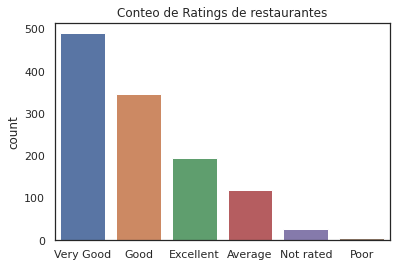

In [ ]:
ax = sns.barplot(counts.index, counts)
ax.set_title('Conteo de Ratings de restaurantes')
ax.set(ylabel='count');

Ahora, si queremos que el eje y sean porcentajes en vez de conteos, podemos simplemente transformar nuestra `Serie` `counts` con una simple regla de 3:

In [ ]:
as_percentages = counts * 100 / counts.sum()
as_percentages

Very Good    41.525424
Good         29.322034
Excellent    16.440678
Average      10.084746
Not rated     2.203390
Poor          0.423729
Name: user_rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


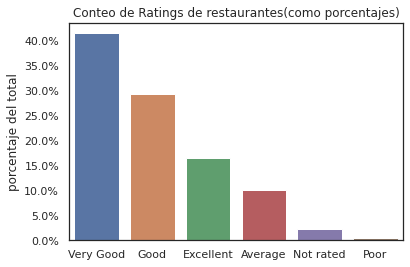

In [ ]:
ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total');
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter()) # Formato %

Si quieres acomodar los nombres de tus tics en el eje x, puedes utilizar el siguiente código para cambiarles la rotación:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


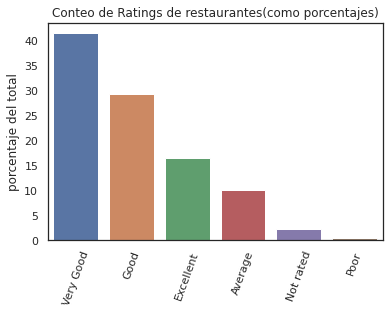

In [ ]:
ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

En este caso no había mucha necesidad de rotar los nombres, pero hay veces que rotar los nombres y/o cambiar el tamaño de la gráfica es la única manera de hacerlos comprensibles.

---

Hay veces que resulta más cómodo y comprensible acomodar nuestras barras de manera horizontal. Esto puede hacerse muy fácilmente agregando la bandera `orient='h'` y cambiando el orden de nuestros inputs:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


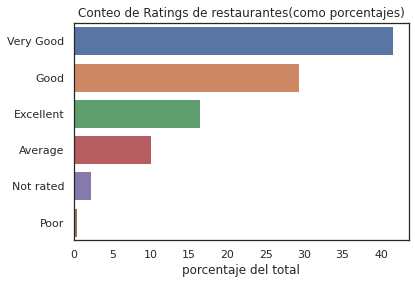

In [ ]:
ax = sns.barplot(as_percentages, as_percentages.index, orient='h')
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(xlabel='porcentaje del total');

**La Moda**

La moda es el "valor típico" de nuestra variable categórica. Representa la categoría que más veces aparece en nuestro conjunto de datos.

Podemos extraer la moda de la tabla de `value_counts` o de la gráfica de barras, pero `pandas` también ofrece un método para obtenerla fácilmente:

In [ ]:
df['user_rating'].mode()

0    Very Good
dtype: object

### Ejemplo 3: Tablas de contingencia

1. Objetivos:
    - Aprender a generar tablas de contingencia usando el método `crosstab`
 
---
    
2. Desarrollo:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Datasets/Remoto zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


Podemos usar el método `crosstab` para generar tablas de contingencia usando dos de nuestras variables categóricas:

In [ ]:
pd.crosstab(df['price_range'], df['user_rating']) # Tabla de contingencia

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


Podemos obtener una columna y una fila con los totales añadiendo la bandera `margins` y `margins_name`:

In [ ]:
pd.crosstab(df['price_range'], df['user_rating'], margins=True, margins_name='total')

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good,total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
total,119,194,346,26,5,490,1180


Como puedes observar, el índice está indicando la primera agrupación de nuestros datos (la columna 'price_range'), mientras que las columnas indican la segunda agrupación (la columna 'user_rating').

---

También podemos añadir una variable categórica más para generar múltiples niveles en las columnas:

In [ ]:
pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']], margins=True, margins_name='total')

has_online_delivery       0                           ...    1                total
user_rating         Average Excellent Good Not rated  ... Good Poor Very Good      
price_range                                           ...                          
1                        12         8   32         1  ...    1    0         4    74
2                        47        30  104         3  ...   12    1        33   337
3                        40        70  132         3  ...    9    0        35   488
4                        19        61   52        19  ...    4    0         8   281
total                   118       169  320        26  ...   26    1        80  1180

[5 rows x 12 columns]

**Múltiples niveles en columnas**

Es un buen momento para aprender a indexar múltiples niveles en columnas. Recordarás que los multiíndices en filas se indexan de la siguiente forma:

df.loc[(primer_indice, segundo_indice)]

Cuando tenemos múltiples niveles en las columnas, simplemente pasamos como primer valor nuestra indexación por filas, y después una tupla con la indexación por columnas:

In [ ]:
crosstab = pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']])

In [ ]:
crosstab

has_online_delivery       0                 ...    1               
user_rating         Average Excellent Good  ... Good Poor Very Good
price_range                                 ...                    
1                        12         8   32  ...    1    0         4
2                        47        30  104  ...   12    1        33
3                        40        70  132  ...    9    0        35
4                        19        61   52  ...    4    0         8

[4 rows x 11 columns]

In [ ]:
crosstab.loc[:, (1)] # Obtiene tabla de contigencia del nivel y valor definido

user_rating,Average,Excellent,Good,Poor,Very Good
price_range,,,,,
1,0,1,1,0,4
2,0,7,12,1,33
3,1,14,9,0,35
4,0,3,4,0,8


In [ ]:
crosstab.loc[:, (1, 'Poor')]

price_range
1    0
2    1
3    0
4    0
Name: (1, Poor), dtype: int64

Aquí hemos obtenido la columna 'Poor' del grupo `has_online_delivery == 1`.

---

También otra cosa que podríamos hacer es usar el método `stack`. `stack` lo que hace es tomar una de nuestras columnas y convertirla en índice. Si le pedimos que haga el `stack` en el nivel 0, convertirá el nivel 'has_online_delivery' en índice:

In [ ]:
crosstab.stack(level=0)

user_rating                      Average  Excellent  ...  Poor  Very Good
price_range has_online_delivery                      ...                 
1           0                         12          8  ...     0         15
            1                          0          1  ...     0          4
2           0                         47         30  ...     1         99
            1                          0          7  ...     1         33
3           0                         40         70  ...     1        183
            1                          1         14  ...     0         35
4           0                         19         61  ...     2        113
            1                          0          3  ...     0          8

[8 rows x 6 columns]

In [ ]:
stack_level_0 = crosstab.stack(level=0)

stack_level_0.loc[(2)]

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
has_online_delivery,,,,,,
0,47,30,104,3.0,1,99
1,0,7,12,NaN,1,33


In [ ]:
stack_level_0.loc[(2, 1)]

user_rating
Average       0.0
Excellent     7.0
Good         12.0
Not rated     NaN
Poor          1.0
Very Good    33.0
Name: (2, 1), dtype: float64

Si hacemos el stack por el nivel 1, obtenemos lo siguiente:

In [ ]:
crosstab.stack(level=1)

has_online_delivery        0     1
price_range user_rating           
1           Average       12   0.0
            Excellent      8   1.0
            Good          32   1.0
            Not rated      1   NaN
            Poor           0   0.0
            Very Good     15   4.0
2           Average       47   0.0
            Excellent     30   7.0
            Good         104  12.0
            Not rated      3   NaN
            Poor           1   1.0
            Very Good     99  33.0
3           Average       40   1.0
            Excellent     70  14.0
            Good         132   9.0
            Not rated      3   NaN
            Poor           1   0.0
            Very Good    183  35.0
4           Average       19   0.0
            Excellent     61   3.0
            Good          52   4.0
            Not rated     19   NaN
            Poor           2   0.0
            Very Good    113   8.0

¡Esto es otro nivel de manipulaciónd de DataFrames!

### Ejemplo 4: Graficando con múltiples axis

1. Objetivos:
    - Aprender a generar varias gráficas al mismo tiempo para hacer comparaciones.
 
---

2. Desarrollo:

Tomemos la primera tabla de contingencia del Ejemplo pasado para graficarla:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Datasets/Remoto zomato_reviews-clean.json')

df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
crosstab = pd.crosstab(df['price_range'], df['user_rating'])

crosstab

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


¿Recuerdas el objeto `figure`? Bueno, si `figure` es el objeto que contiene nuestras gráficas, los objetos `axes` son los encargados de dibujar cada una de las gráficas. `figure` contiene `axes` y nuestras gráficas se dibujan sobre los `axes`.

Usando el método `subplots`, podemos generar al mismo tiempo una nueva figura y múltiples `axes` que están contenidos en esa figura:

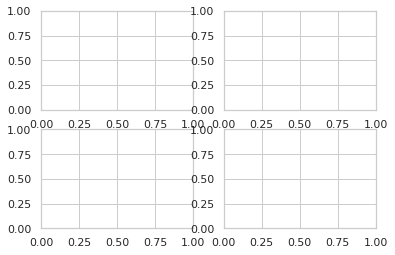

In [ ]:
fig, axes = plt.subplots(2, 2)

Le pasamos a `subplots` la estructura de nuestra 'tabla' de gráficas. En este caso, le indicamos un entramado de 2 x 2 porque tenemos 4 valores en el primer nivel.

Grafiquemos:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

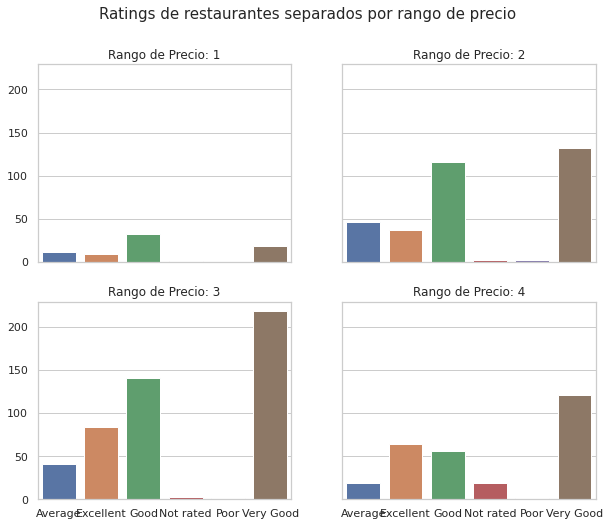

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(crosstab.columns, crosstab.loc[1], ax=axes[0, 0])
sns.barplot(crosstab.columns, crosstab.loc[2], ax=axes[0, 1])
sns.barplot(crosstab.columns, crosstab.loc[3], ax=axes[1, 0])
sns.barplot(crosstab.columns, crosstab.loc[4], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Rango de Precio: 1')
axes[0, 1].set(xlabel='', ylabel='', title='Rango de Precio: 2')
axes[1, 0].set(xlabel='', ylabel='', title='Rango de Precio: 3')
axes[1, 1].set(xlabel='', ylabel='', title='Rango de Precio: 4')

fig.suptitle('Ratings de restaurantes separados por rango de precio', fontsize=15);

Cosas importantes a notar:

1. Agregamos las banderas `sharex` y `sharey` porque tenemos el mismo eje x para todas nuestras gráficas y porque queremos comparar las gráficas una contra otra. Si nuestro eje y no fuera igual para todas, sería más difícil comparar usando sólo la vista.
2. La variable `axes` contiene un arreglo de dos dimensiones con cada uno de nuestros `ax` (el contenedor de cada gráfica). Así como accedemos a cualquier arreglo de 2 dimensiones, acceder a un `ax` se lleva a cabo de esta manera: `axes[0, 1]`.
3. Eliminamos los `xlabels` y los `ylabels` porque no son muy informativos y generan ruido visual. En cambio, cada gráfica necesita un título para saber a qué categoría del primer nivel pertenece.
4. Agregamos un título a la `figure` (en lugar de al `ax`) usando el método `suptitle`.

### Ejemplo 5: Boxplots y Violinplots

1. Objetivos:
    - Aprender a generar boxplots y violinplots para analizar distribuciones de valores numéricos agrupados usando una variable categórica.
 
---
    
2. Desarrollo:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [ ]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)

In [ ]:
merged

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M
...,...,...,...,...
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F
135569,29.000000,179.0,89.0,M


La tabla `merged` tiene 3 variables numéricas y 1 variable categórica. Ya hemos visto cómo podemos analizar la distribución de una variable numérica utilizando boxplots:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


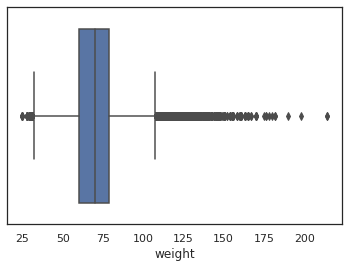

In [ ]:
sns.boxplot(df['weight'])

Pero dado que tenemos una variable categórica (en este caso binaria, pues tiene solo dos valores posibles), podemos utilizar dos boxplots paralelos para analizar la distribución de esta misma variable numérica después de ser agrupada utilizando la variable categórica:

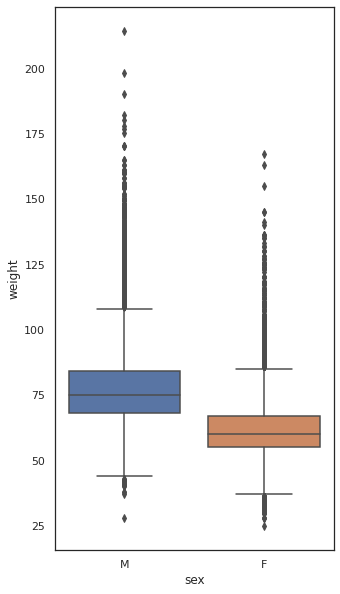

In [ ]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='sex', y='weight');

También podemos explorar las distribuciones usando un violinplot. Un violinplot es muy parecido a un boxplot, pero la diferencia es que en vez de graficar frecuencias grafica estimados de densidad. ¿Recuerdas las gráficas de densidad que utilizamos para hacer los histogramas más 'suaves' y poder comparar dos histogramas al mismo tiempo? Bueno, un violinplot es básicamente un boxplot mezclado con una gráfica de densidad.

En un violinplot es mucho más fácil ver ciertos detalles en la distribución de los datos que no es posible ver en los boxplots (ya que un boxplot no tiene mucha flexibilidad en cuanto a figuras se refiere). En cambio, en un violinplot es mucho más difícil ver los valores atípicos y dónde se encuentran ubicados.

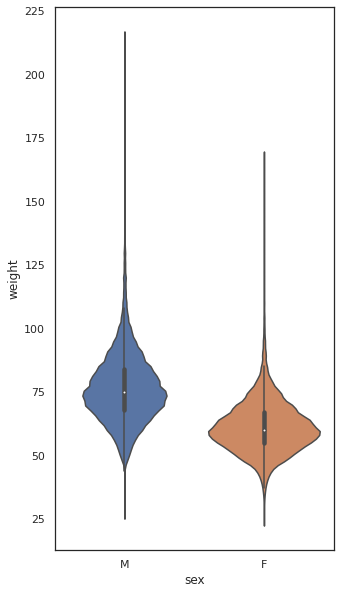

In [ ]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='sex', y='weight');

La 'pildorita' negra en medio del violinplot representa el Rango Intercuartílico y el punto blanco la mediana. Así puedes comparar más fácilmente lo que estamos viendo en esta gráfica con la gráfica anterior.

### Reto 1: Anotando gráficas

1. Objetivos:
    - Aprender a hacer gráficas más claras añadiendo anotaciones y cambiando el tamaño
 
---
    
2. Desarrollo:

A continuación verás algunas gráficas que han sido realizadas de antemano. Tu Reto es añadir títulos, nombres de ejes, leyendas, etc. para que estas gráficas sean más comprensibles. En el caso de que sea necesario, aumenta también el tamaño de la gráfica

Para que puedas echarle un vistazo al tema de este dataset, [visita este link](https://www.kaggle.com/uciml/pima-indians-diabetes-database). Es importante saber de qué hablamos para saber anotar correctamente nuestras gráficas.

Entonces:

1. Aumenta de tamaño la gráfica si consideras que sería más comprensible de esa manera
2. Donde sea adecuado, añade títulos, nombres de ejes y leyendas

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set_style('white')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Remoto diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


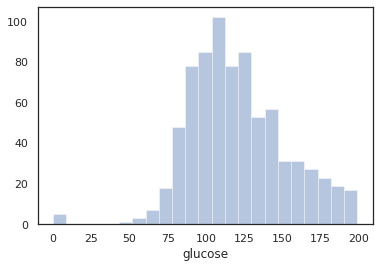

In [ ]:
sns.distplot(df['glucose'], kde=False, norm_hist=False)

b)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


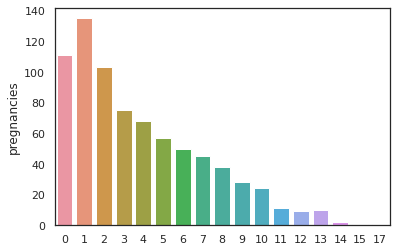

In [ ]:
pregnancy_counts = df['pregnancies'].value_counts()
sns.barplot(pregnancy_counts.index, pregnancy_counts)

c)

In [ ]:
healthy = df[df['outcome'] == 0]
sick = df[df['outcome'] == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


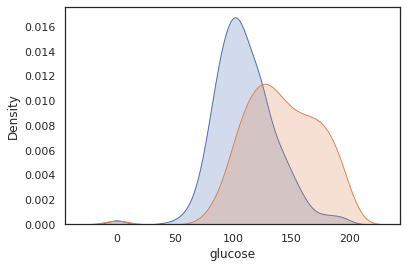

In [ ]:
sns.distplot(healthy['glucose'], hist=False, kde_kws={'shade': True})
sns.distplot(sick['glucose'], hist=False, kde_kws={'shade': True})

d)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

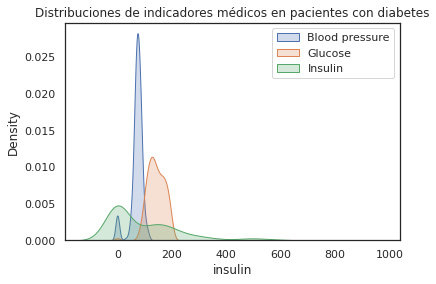

In [ ]:
sns.distplot(sick['blood_pressure'], hist=False, kde_kws={'shade': True}, label='Blood pressure')
sns.distplot(sick['glucose'], hist=False, kde_kws={'shade': True}, label='Glucose')
ax = sns.distplot(sick['insulin'], hist=False, kde_kws={'shade': True}, label='Insulin')
ax.set(title='Distribuciones de indicadores médicos en pacientes con diabetes')
ax.legend()

### Reto 2: Gráficas de barras

1. Objetivos:
    - Aprender a hacer gráficas de barras de distintos tipos
 
---
    2. Desarrollo:

Para este ejercicio vamos a utilizar el dataset 'melbourne_housing-clean.csv'. La fuente original [está aquí](https://www.kaggle.com/anthonypino/melbourne-housing-market), en caso de que quieras recordar de qué trata.

Realiza 1 de estas 3 gráficas de barras utilizando este dataset. Las instrucciones para cada una son las siguientes:

1. Gráfica de barras *verticales* usando la columna `rooms`. El eje y será el *conteo de frecuencia* de cada categoría. Las barras tienen que quedar *ordenadas en orden descendente* (es decir, de la más larga a la màs corta). Para lograr ordenarlas, tendrás que revisar [la documentación](https://seaborn.pydata.org/generated/seaborn.barplot.html) de la gráfica de barras de Seaborn.

2. Gráfica de barras *verticales* de la columna `types`. El eje y será el *porcentaje de frecuencia* de cada categoría.

3. Gráfica de barras *h*orizontales* de la columna `council_area`. El eje x será el *conteo de frecuencia* de cada categoría.

In [ ]:
import pandas as pd
import matplotlib as plt
plt.rc_file_defaults()

import seaborn as sns
sns.set_style('white')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/melbourne_housing-clean.csv', index_col=0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df['rooms'].value_counts()

3    4916
2    3389
4    2146
1     645
5     479
6      55
7       9
8       7
Name: rooms, dtype: int64

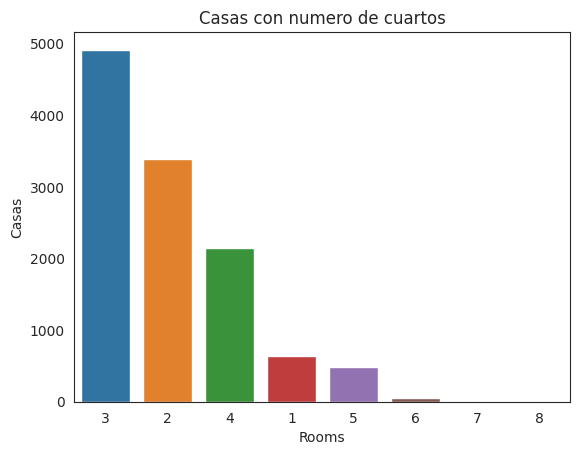

In [ ]:
rooms_count = df['rooms'].value_counts()
ax = sns.barplot(x=rooms_count.index, y=rooms_count, order=rooms_count.index);
ax.set(title='Casas con numero de cuartos', xlabel='Rooms', ylabel='Casas');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


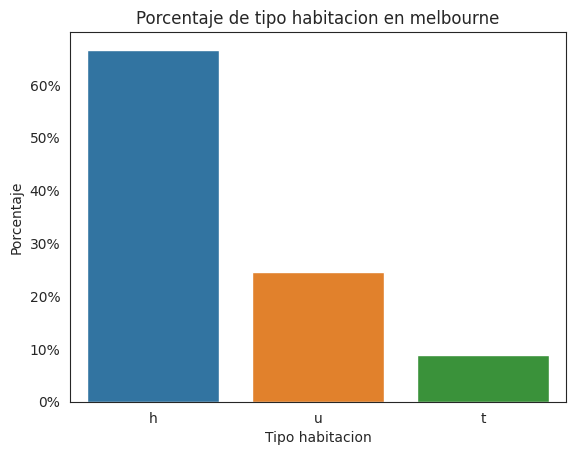

In [ ]:
type_counts = df['type'].value_counts()
type_counts *= 100/ type_counts.sum()
ax = sns.barplot(type_counts.index, type_counts)
ax.set(title='Porcentaje de tipo habitacion en melbourne', xlabel='Tipo habitacion', ylabel='Porcentaje')
ax.yaxis.set_major_formatter(plt.ticker.PercentFormatter())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


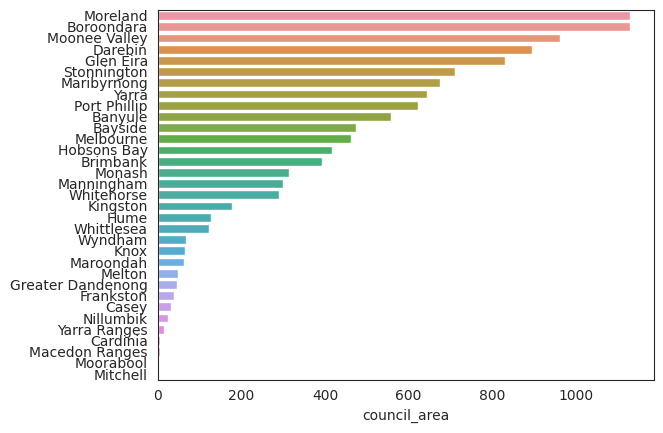

In [ ]:
council_counts = df['council_area'].value_counts()
ax = sns.barplot(council_counts, council_counts.index, orient='h');

### Reto 3: Tablas de contingencia

1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.
 
---
    
2. Desarrollo:

En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 o 3 variables categóricas y luego realizar algunas visualizaciones. Elige el Reto a) o b) y sigue las instrucciones.

**a) Segmentando por tipo y número de cuartos**

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [ ]:
# Tu código va aquí
#
# ...
# ...

**b) Segmentando por región, tipo y número de cuartos**

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

In [ ]:
# Tu código va aquí
#
# ...
# ...

<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
    
type_rooms = pd.crosstab(df['type'], df['rooms'])
sns.barplot(type_rooms.loc['h'].index, type_rooms.loc['h'])
sns.barplot(type_rooms.loc['t'].index, type_rooms.loc['t'])
sns.barplot(type_rooms.loc['u'].index, type_rooms.loc['u'])
    
regionname_type_rooms = pd.crosstab(df['region_name'], [df['type'], df['rooms']])
regionname_type_rooms_stacked = regionname_type_rooms.stack(level=0)
sns.barplot(regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')])
```
    
</details>

### Reto 4: Graficando múltiples axis

1. Objetivos:
    - Usar subplots para graficar múltiples gráficas de barras al mismo tiempo
 
---
    
2. Desarrollo:

En el Reto pasado generamos tablas de contingencia para segmentar nuestros datos usando dos o más variables categóricas. El problema con nuestras gráficas es que resultaba muy incómodo e ineficiente compararlas. Una manera mucho más efectiva de comparar varias gráficas es graficarlas en la misma figura. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea una tabla de contingencia donde el índice esté dado por la variable 'region_name' y las columnas por la variable 'type'. Esto nos va a dar una tabla donde tenemos la frecuencia de cada tipo de propiedad segmentada por regiones.
3. Genera una figura con 8 subplots para hacer gráficas de barras de cada región en nuestro dataset. Cada gráfica tendrá 3 barras, correspondiendo a los tipos 'h', 't' y 'u'.
4. Asegúrate de que compartan eje `x` y `y` para que sea fácil compararlas. Además agrega anotaciones y títulos donde creas necesario.
5. Describe tus hallazgos y comparte con tus compañeros qué podrían significar.

<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
regionname_type = pd.crosstab(df['region_name'], [df['type']])

fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)

sns.barplot(regionname_type.loc['Eastern Metropolitan'].index, regionname_type.loc['Eastern Metropolitan'], ax=axes[0, 0])
sns.barplot(regionname_type.loc['Eastern Victoria'].index, regionname_type.loc['Eastern Victoria'], ax=axes[0, 1])
sns.barplot(regionname_type.loc['Northern Metropolitan'].index, regionname_type.loc['Northern Metropolitan'], ax=axes[0, 2])
sns.barplot(regionname_type.loc['Northern Victoria'].index, regionname_type.loc['Northern Victoria'], ax=axes[0, 3])
sns.barplot(regionname_type.loc['South-Eastern Metropolitan'].index, regionname_type.loc['South-Eastern Metropolitan'], ax=axes[1, 0])
sns.barplot(regionname_type.loc['Southern Metropolitan'].index, regionname_type.loc['Southern Metropolitan'], ax=axes[1, 1])
sns.barplot(regionname_type.loc['Western Metropolitan'].index, regionname_type.loc['Western Metropolitan'], ax=axes[1, 2])
sns.barplot(regionname_type.loc['Western Victoria'].index, regionname_type.loc['Western Victoria'], ax=axes[1, 3])
```
    
</details>

### Reto 5: Boxplots y violinplots

1. Objetivos:
    - Comparar distribuciones de variables numéricas segmentadas por variables categóricas usando boxplots y violinplots
 
---
    
2. Desarrollo:

Vamos a seguir analizando nuestro dataset 'melbourne_housing-clean.csv', esta vez viéndolo desde aún otra perspectiva más. Vamos a generar boxplots y violinplots de la distribución de los precios de las propiedad segmentándolos por tipo de propiedad antes. Tu reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea un boxplot donde el eje x sea la variable 'type' y el eje y sea la variable 'price'.
3. Agrega títulos y anotaciones que creas convenientes. Modifica el tamaño si lo crees necesario.
4. Crea un violinplot donde el eje x sea la variable 'type' y el eje y sea la variable 'price'.
5. Agrega títulos y anotaciones que creas convenientes. Modifica el tamaño si lo crees necesario.
6. Compara ambas gráficas y comenta con tus compañeros y la experta si creen que nos dan información distinta o no.

<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)

plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='type', y='price')

plt.figure(figsize=(10, 10))
sns.violinplot(data=df, x='type', y='price')
```
    
</details>